# 1. Getting Started: Airbnb Copenhagen

This assignment deals with the most recent Airbnb listings in Copenhagen. The data is collected from [Inside Airbnb](http://insideairbnb.com/copenhagen). Feel free to explore the website further in order to better understand the data. The data (*listings.csv*) has been collected as raw data and needs to be preprocessed.

**Hand-in:** Hand in as a group in Itslearning in a **single**, well-organized and easy-to-read Jupyter Notebook. Please just use this notebook to complete the assignment.

If your group consists of students from different classes, upload in **both** classes.

The first cell does some preprocessing. Please just run these cells and do not change anything. The assignment starts below. Make sure that listings.csv' is in the same folder as this notebook




,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365,price_category
0,6983,Copenhagen 'N Livin',16774,Simon,Nørrebro,55.686410,12.547410,Entire home/apt,898.0,3,...,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0,0
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,2600.0,4,...,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303,1
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,3250.0,3,...,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56,1
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,725.0,7,...,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59,0
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,1954.0,3,...,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0,1


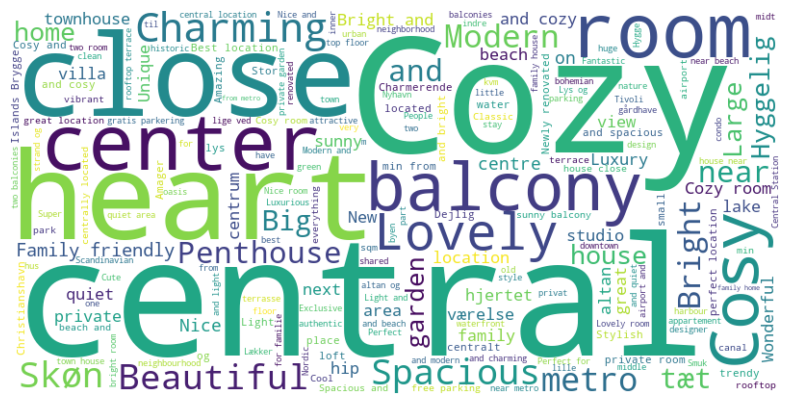

In [6]:
# pip install pandas
# pip install scikit-learn
import pandas as pd
import sklearn as sk

# load the data
data = pd.read_csv('listings.csv')

# filter relevant columns
data_limited = data[["id",
    "name",
    "host_id"  ,
    "host_name" , 
    "neighbourhood_cleansed"  ,
    "latitude"  ,
    "longitude"  ,
    "room_type"  ,
    "price"  ,
    "minimum_nights"  ,
    "number_of_reviews",  
    "last_review"  ,
    "review_scores_rating"  ,
    "review_scores_accuracy" , 
    "review_scores_cleanliness"  ,
    "review_scores_checkin"  ,
    "review_scores_communication"  ,
    "review_scores_location"  ,
    "review_scores_value"  ,
    "reviews_per_month"  ,
    "calculated_host_listings_count"  ,
    "availability_365",]]

# removing rows with no reviews

data_filtered = data_limited.loc[data_limited['number_of_reviews'] != 0]

# remove nan

data_filtered = data_filtered.dropna()
data_filtered.head()

# get a list of distinct values from neighbourhood_cleansed columns in data_filtered

neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# replace e.g. Nrrbro with Nørrebro in neighbourhood_cleansed column

data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Nrrebro", "Nørrebro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("sterbro", "Østerbro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Vanlse", "Vanløse")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Brnshj-Husum", "Brønshøj-Husum")
neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# Remove dollar signs and commas and convert to float - note the prices are actually in DKK
data_filtered['price'] = data_filtered['price'].replace('[\$,]', '', regex=True).astype(float)

# Calculate the median price
median_price = data_filtered['price'].median()

# Create a new column 'price_category' with 0 for 'affordable' and 1 for 'expensive'
data_filtered['price_category'] = (data_filtered['price'] > median_price).astype(int)

display(data_filtered.head())

# Describe the apartments using a wordcloud
# Remember to install packages
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine the two lists of stop words
stop_words = ['Østerbro', 'Copenhagen', 'København', 'in', 'bedroom', 'bedrooms', 'bed', 'beds', 'bath', 'baths', 'Frederiksberg', 'V', 'Ø', 'SV', 'S', 'N', 'K', 'C', 'W', 'kbh', 'Ballerup', 'Hellerup', 'Valby', 'Vanløse', 'Brønhøj', 'Nørrebro', 'Vesterbro', "CPH", "with", "to", "of", "a", "the", "på", "i", "med", "af", "at", "city", "by", "apartment", "appartment", "lejlighed", "flat", "m2", "apt"]

# Convert the 'name' column to a single string
text = ' '.join(data_filtered['name'].astype(str))

# Create and generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Your tasks start here


### 1. Since data science is so much fun, provide a word cloud of the names of the hosts, removing any names of non-persons. Does this more or less correspond with the distribution of names according to [Danmarks Statistik](https://www.dst.dk/da/Statistik/emner/borgere/navne/navne-i-hele-befolkningen)?

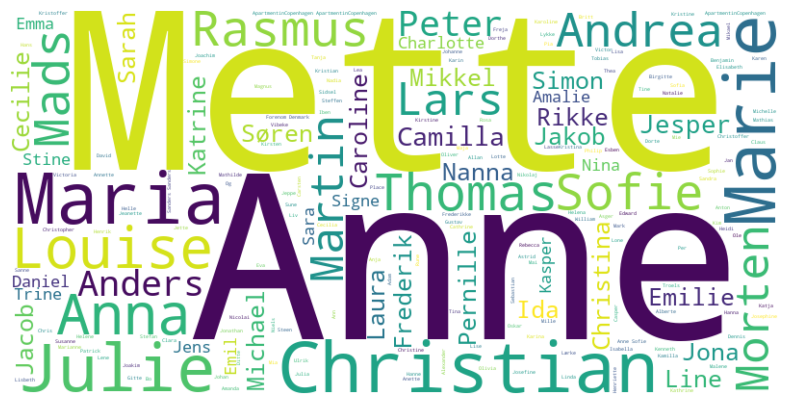

In [7]:
# State your solution here. Add more cells if needed.
names = data_filtered["host_name"]

names_text = ' '.join(names.astype(str))

stop_words = ['Og', 'and', '&','Apartment', 'Copenhagen', 'Aarhus', 'Odense']

wordcloud = WordCloud(background_color="white", width=800, height=400).generate(names_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 2. Using non-scaled versions of latitude and longitude, plot the listings data on a map.

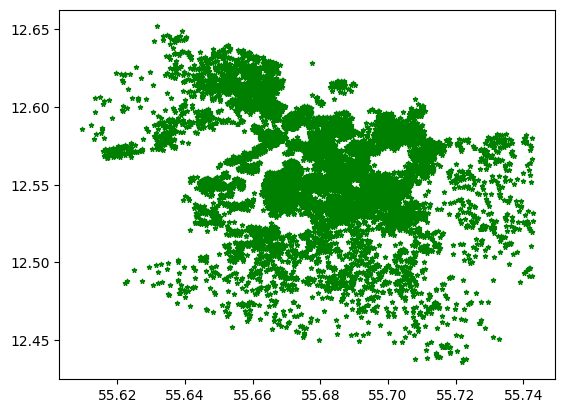

In [8]:
# State your solution here. Add more cells if needed.


longitudes = data_filtered['longitude']
latitudes = data_filtered['latitude']



plt.scatter(latitudes, longitudes, color='green', marker='*', s=10)

plt.show()

### 3. Create boxplots where you have the neighbourhood on the x-axis and price on the y-axis. What does this tell you about the listings in Copenhagen? Keep the x-axis as is and move different variables into the y-axis to see how things are distributed between the neighborhoods to create different plots (your choice).

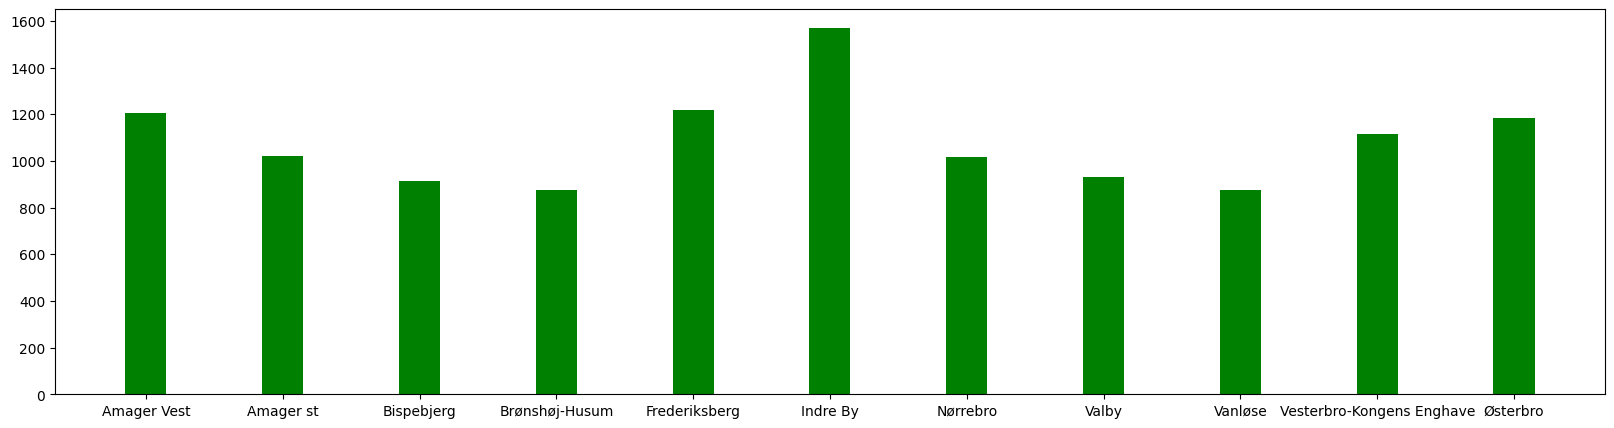

In [9]:
# State your solution here. Add more cells if needed.
neighbourhood_prices = data_filtered.groupby('neighbourhood_cleansed')['price'].mean()

neighborhoods = neighbourhood_prices.index.tolist()
prices = neighbourhood_prices.values.tolist()

plt.figure(figsize=(20, 5))
plt.bar(neighborhoods, prices, color='green', width=0.3)

plt.show()


Listing prices depend a lot on a `neighbourhood`.

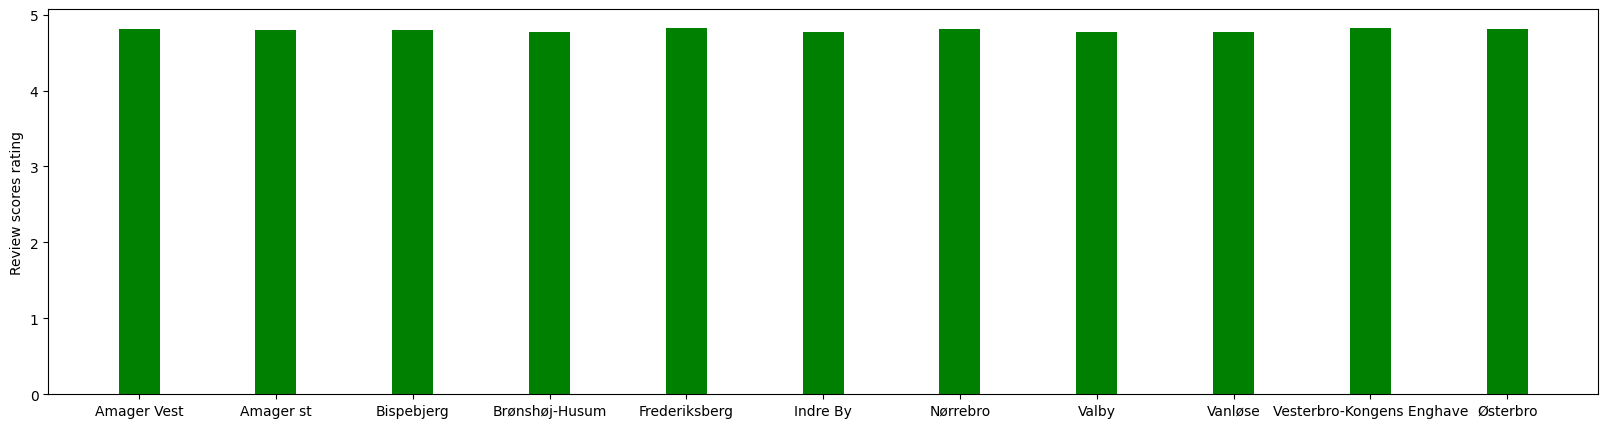

In [10]:
neighbourhood_ratings = data_filtered.groupby('neighbourhood_cleansed')['review_scores_rating'].mean()

neighborhoods = neighbourhood_ratings.index.tolist()
ratings = neighbourhood_ratings.values.tolist()

plt.figure(figsize=(20, 5))
plt.bar(neighborhoods, ratings, color='green', width=0.3)
plt.ylabel('Review scores rating')

plt.show()

`neighbourhood` have very little influance on `review_scores_rating`.

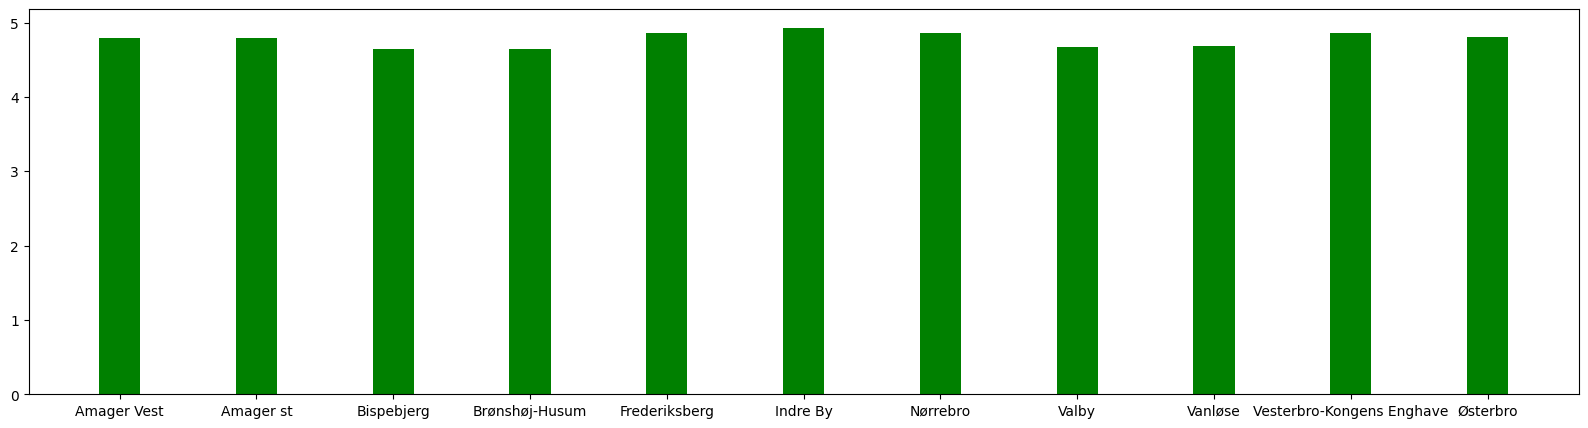

In [11]:
neighbourhood_location_ratings = data_filtered.groupby('neighbourhood_cleansed')['review_scores_location'].mean()

neighborhoods = neighbourhood_location_ratings.index.tolist()
ratings = neighbourhood_location_ratings.values.tolist()

plt.figure(figsize=(20, 5))
plt.bar(neighborhoods, ratings, color='green', width=0.3)

plt.show()

Surprisingly `neighbourhood` has very little influance on `review_scores_location`.

### 4. Do a descriptive analysis of the neighborhoods. Include information about room type in the analysis as well as one other self-chosen feature. The descriptive analysis should contain mean/average, mode, median, standard deviation/variance, minimum, maximum and quartiles.

In [12]:
# State your solution here. Add more cells if needed.
display(data_filtered.groupby(['neighbourhood_cleansed', 'room_type'])['price'].describe())

data_filtered['rating_rounded'] = data_filtered['review_scores_value'].round(0)

data_filtered.groupby(['neighbourhood_cleansed', 'rating_rounded'])['price'].describe()

count         mean          std  \
neighbourhood_cleansed    room_type                                           
Amager Vest               Entire home/apt   909.0  1234.226623   832.696891   
                          Private room      148.0  1032.966216  5299.018095   
                          Shared room         2.0  1051.500000   112.429978   
Amager st                 Entire home/apt   791.0  1093.584071   721.982284   
                          Hotel room          3.0  1296.000000   211.184753   
                          Private room      129.0   549.325581   293.995992   
                          Shared room         1.0  2575.000000          NaN   
Bispebjerg                Entire home/apt   508.0   992.592520  1981.580545   
                          Private room       95.0   488.978947   353.674089   
                          Shared room         1.0   198.000000          NaN   
Brønshøj-Husum            Entire home/apt   216.0  1014.995370   555.669548   
                          Private room       67.0   445.552239   201.631624   
                          Shared room         2.0   211.500000    16.263456   
Frederiksberg             Entire home/apt  1044.0  1292.472222  1958.802772   
                          Private room      133.0   621.706767   567.611220   
Indre By                  Entire home/apt  1702.0  1642.387192  1072.616232   
                          Hotel room         10.0  1077.200000   654.255098   
                          Private room      128.0   698.984375   380.070466   
                          Shared room         4.0   292.000000    67.577116   
Nørrebro                  Entire home/apt  1889.0  1047.742192   583.703218   
                          Private room      165.0   650.121212   760.270040   
                          Shared room         3.0   324.666667   130.481161   
Valby                     Entire home/apt   450.0  1017.968889   635.434691   
                          Private room       89.0   498.157303   288.616366   
Vanløse                   Entire home/apt   254.0   954.425197   496.658320   
                          Private room       44.0   413.409091   194.578652   
Vesterbro-Kongens Enghave Entire home/apt  1811.0  1181.435119   698.122481   
                          Private room      221.0   574.366516   295.726896   
                          Shared room         2.0   330.500000   113.844192   
Østerbro                  Entire home/apt  1174.0  1248.551107  1438.908216   
                          Private room      130.0   605.461538   437.259030   
                          Shared room         1.0   469.000000          NaN   

                                              min      25%     50%      75%  \
neighbourhood_cleansed    room_type                                           
Amager Vest               Entire home/apt   250.0   814.00  1050.0  1480.00   
                          Private room      200.0   400.00   500.0   655.00   
                          Shared room       972.0  1011.75  1051.5  1091.25   
Amager st                 Entire home/apt   240.0   700.00   900.0  1200.00   
                          Hotel room       1149.0  1175.00  1201.0  1369.50   
                          Private room      135.0   400.00   471.0   600.00   
                          Shared room      2575.0  2575.00  2575.0  2575.00   
Bispebjerg                Entire home/apt   235.0   600.00   800.0  1000.00   
                          Private room      143.0   300.00   400.0   528.50   
                          Shared room       198.0   198.00   198.0   198.00   
Brønshøj-Husum            Entire home/apt   250.0   655.75   900.0  1250.00   
                          Private room      145.0   320.00   400.0   500.00   
                          Shared room       200.0   205.75   211.5   217.25   
Frederiksberg             Entire home/apt   300.0   822.50  1037.0  1400.00   
                          Private room      185.0   400.00   500.0   700.00   
Indre By      

count         mean          std  \
neighbourhood_cleansed    rating_rounded                                     
Amager Vest               1.0                1.0  1300.000000          NaN   
                          3.0                8.0  2296.375000  2306.705067   
                          4.0              155.0  1236.922581   966.095660   
                          5.0              895.0  1190.502793  2261.348391   
Amager st                 1.0                1.0   600.000000          NaN   
                          3.0                4.0   839.750000   285.338834   
                          4.0              172.0  1102.726744   916.591053   
                          5.0              747.0  1002.306560   647.565996   
Bispebjerg                2.0                1.0   450.000000          NaN   
                          3.0                4.0   619.750000   266.748789   
                          4.0              117.0   825.068376   464.071575   
                          5.0              482.0   936.568465  2037.312522   
Brønshøj-Husum            3.0                4.0   646.250000   402.147879   
                          4.0               51.0   967.333333   538.801658   
                          5.0              230.0   859.108696   556.173539   
Frederiksberg             3.0                5.0   950.000000   229.128785   
                          4.0              200.0  1129.705000   637.365296   
                          5.0              972.0  1235.943416  2033.251361   
Indre By                  1.0                1.0  2000.000000          NaN   
                          2.0                2.0  1956.500000   504.167135   
                          3.0               10.0  1174.200000   428.794382   
                          4.0              402.0  1616.835821  1019.627578   
                          5.0             1429.0  1559.923023  1082.173255   
Nørrebro                  2.0                1.0  1795.000000          NaN   
                          3.0                9.0   930.555556   268.562894   
                          4.0              370.0  1060.483784   885.240537   
                          5.0             1677.0  1004.698867   530.765530   
Valby                     1.0                2.0   734.500000    92.630988   
                          3.0                3.0  1833.333333  1877.054430   
                          4.0              105.0   784.733333   345.242509   
                          5.0              429.0   962.834499   655.765446   
Vanløse                   3.0                1.0   950.000000          NaN   
                          4.0               57.0   918.947368   602.387880   
                          5.0              240.0   863.683333   477.727351   
Vesterbro-Kongens Enghave 2.0                1.0  2000.000000          NaN   
                          3.0                7.0  1768.142857  1479.304164   
                          4.0              286.0  1157.020979   870.063256   
                          5.0             1740.0  1104.534483   653.155135   
Østerbro                  2.0                5.0  1472.800000   346.385190   
                          3.0               11.0   893.727273   287.230253   
                          4.0              218.0  1243.495413   941.177355   
                          5.0             1071.0  1173.390289  1468.186702   

                                             min      25%     50%      75%  \
neighbourhood_cleansed    rating_rounded                                     
Amager Vest               1.0             1300.0  1300.00  1300.0  1300.00   
                          3.0              500.0  1023.25  1550.0  2227.75   
                          4.0              249.0   750.00   994.0  1475.00   
                          5.0              200.0   712.00  1000.0  1399.50   
Amager st                 1.0              600.0   600.00   600.0   600.00   
                          3.0              483.0   683.25   872.

### 5. Based on self-chosen features, develop a logistic regression model and k-Nearest Neighbor model to determine whether a rental property should be classified as 0 or 1. Remember to divide your data into training data and test data. Comment on your findings.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


drop_cols = [
    "id",
    "name",
    "host_id"  ,
    "host_name" , 
    "price",
    "last_review",
    "review_scores_accuracy" , 
    "review_scores_cleanliness"  ,
    "review_scores_checkin"  ,
    "review_scores_communication"  ,
    "review_scores_location"  ,
    "review_scores_value",
    "price_category"
    ]

model_data = data_filtered.drop(drop_cols, axis=1)

model_data = pd.get_dummies(model_data, columns=['neighbourhood_cleansed', 'room_type'], dtype=float, drop_first=True)

labels = data_filtered['price_category']

data_rest, data_train, labels_rest, labels_train = train_test_split(model_data, labels, test_size=0.2, random_state=42)

data_val, data_test, labels_val, labels_test = train_test_split(data_rest, labels_rest, test_size=0.2, random_state=42)



In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_train = scaler.fit_transform(data_train)

data_rest = scaler.transform(data_rest)
data_val = scaler.transform(data_val)
data_test = scaler.transform(data_test)

## Logistic regression solution

In [15]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100 ],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear',  'lbfgs', 'newton-cg']
}

best_params = {}
best_acc = 0
for C in param_grid['C']:
    for penalty in param_grid['penalty']:
        for solver in param_grid['solver']:

            try:
                lr = LogisticRegression(C=C, penalty=penalty, solver=solver, max_iter=1000)
                lr.fit(data_train, labels_train)
                score = lr.score(data_val, labels_val)
                if score > best_acc:
                    best_acc = score
                    print(f'New best accuracy: {best_acc}')
                    best_params = {'C': C, 'penalty': penalty, 'solver': solver}
                    
            except BaseException as e:
                continue

print(best_acc)
best_params

New best accuracy: 0.6556701030927835
New best accuracy: 0.6778350515463918
New best accuracy: 0.678479381443299
New best accuracy: 0.6787371134020619
0.6787371134020619


{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [16]:
lr = LogisticRegression(C=best_params['C'], penalty=best_params['penalty'], solver=best_params['solver'], max_iter=1000)
lr.fit(data_rest, labels_rest)

lr.score(data_test, labels_test)

0.7103092783505155

## K-nearest neighbors solution

In [17]:
param_grid = {
    'n': [3, 5, 7, 9, 11, 13, 15,17,19],
    'metric': ['euclidean', 'manhattan', "minkowski", "chebyshev" ],
}

best_params = {}
best_acc = 0
for n in param_grid['n']:
    for metric in param_grid['metric']:
        try:
            knn = KNeighborsClassifier(n_neighbors=n, metric=metric)
            knn.fit(data_train, labels_train)
            score = knn.score(data_val, labels_val)
            if score > best_acc:
                best_acc = score
                print(f'New best accuracy: {best_acc}')
                best_params = {'n': n, 'metric': metric}
                    
        except BaseException as e:
            continue




print(best_acc)
best_params

New best accuracy: 0.6543814432989691
New best accuracy: 0.6569587628865979
New best accuracy: 0.6583762886597938
New best accuracy: 0.6604381443298969
New best accuracy: 0.6621134020618556
New best accuracy: 0.6658505154639175
New best accuracy: 0.6664948453608247
New best accuracy: 0.6719072164948454
0.6719072164948454


{'n': 11, 'metric': 'euclidean'}

In [18]:
knn = KNeighborsClassifier(n_neighbors=best_params['n'], metric=best_params['metric'])
knn.fit(data_rest, labels_rest)
knn.score(data_test, labels_test)

0.76340206185567

In [22]:
from sklearn.svm import SVC

param_grid = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 'scale'], 
}

best_params = {}
best_acc = 0

for k in param_grid['kernel']:
    for c in param_grid['C']:
        for g in param_grid['gamma']:
            try:
                svc = SVC(kernel=k, C=c, gamma=g)
                svc.fit(data_train, labels_train)
                score = svc.score(data_val, labels_val)
                
                if score > best_acc:
                    best_acc = score
                    print(f'New best accuracy: {best_acc}')
                    best_params = {'kernel': k, 'C': c, 'gamma': g}
                    
            except BaseException as e:
                print(e)
                continue


print(best_params)
print(best_acc)

New best accuracy: 0.6595360824742268
New best accuracy: 0.6596649484536082
New best accuracy: 0.6728092783505155
New best accuracy: 0.6800257731958763
New best accuracy: 0.6831185567010309
{'kernel': 'rbf', 'C': 10, 'gamma': 'scale'}
0.6831185567010309
